In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
names1880=pd.read_csv('Ch02/names/yob1880.txt', names = ['name','sex','births'])
names1880[:10]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [3]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 31.3+ KB


In [4]:
names1880.groupby('sex').births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

In [5]:
years = range(1880,2016)
pieces=[]
columns = ['name','sex','births']

for year in years:
    path = 'Ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

names=pd.concat(pieces, ignore_index=True) #concat glues the DataFrame objectives together row-wise by default. You have to pass
# ignore_index = True becuase we are not interested in preserving the original row numbers returned from read_cvs. 

In [6]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859026 entries, 0 to 1859025
Data columns (total 4 columns):
name      object
sex       object
births    int64
year      int64
dtypes: int64(2), object(2)
memory usage: 42.5+ MB


In [7]:
total_births = names.pivot_table(
    values= 'births',
    index ='year',
    columns='sex',
    aggfunc=sum
)

In [8]:
total_births[:10]

sex,F,M
year,,
1880,90992,110491
1881,91953,100743
1882,107847,113686
1883,112318,104627
1884,129020,114443
1885,133055,107799
1886,144533,110784
1887,145981,101415
1888,178624,120851


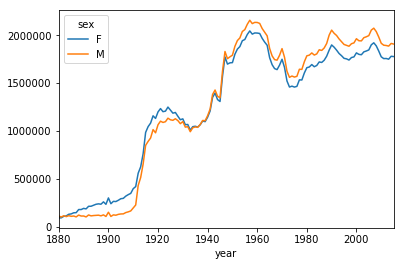

In [9]:
total_births.plot()

In [10]:
def add_prop(group):
    # Integer divison floors
    births = group.births.astype(float) #sum the births column
    group['prop'] = births/births.sum() #divde each births value by the summed births, add a new column 
    return group

In [11]:
names = names.groupby(['year','sex']).apply(add_prop)

In [17]:
# Sanity check: Verify the prop column usms to 1 within all the groups. 
# Use np.allclose to check since dealing with floating point data
np.allclose(names.groupby(['year','sex']).prop.sum(),1)

True

In [18]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
2011  F      1.0
      M      1.0
2012  F      1.0
      M      1.0
2013  F      1.0
      M      1.0
2014  F      1.0
    

In [21]:
#Extract the top 1000 data sets
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

In [26]:
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000) #get_top1000(grouped) does not work, possibly becuase grouped is a groupby object
top1000.info()

C:\Users\cfang\AppData\Local\Continuum\Anaconda2\envs\py3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 271877 entries, (1880, F, 0) to (2015, M, 1846013)
Data columns (total 5 columns):
name      271877 non-null object
sex       271877 non-null object
births    271877 non-null int64
year      271877 non-null int64
prop      271877 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.3+ MB


## Analyzing Naming Trends

In [27]:
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']

In [29]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 1880 to 2015
Columns: 7064 entries, Aaden to Zuri
dtypes: float64(7064)
memory usage: 7.3 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1AF208F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1AA0D3F0>], dtype=object)

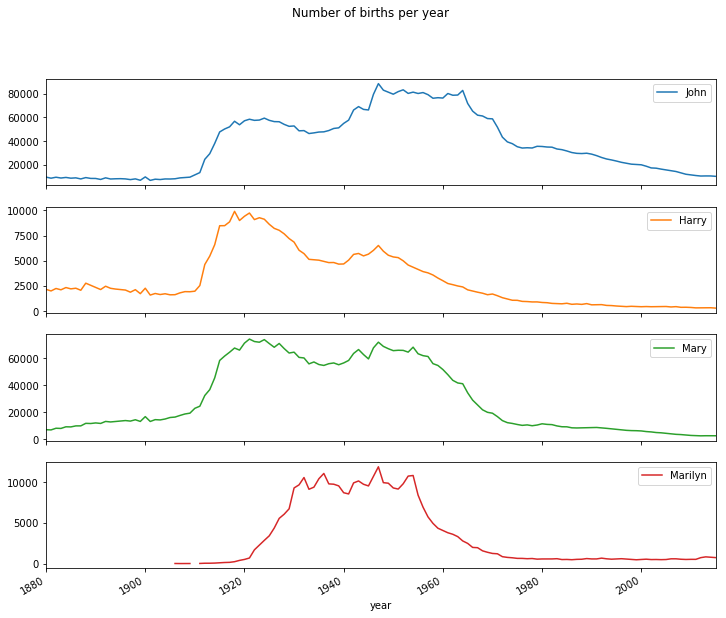

In [34]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot(subplots=True,figsize=(12,10),grid=False,title='Number of births per year')

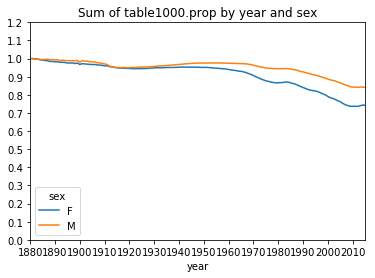

In [35]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0,1.2,13), xticks = range(1880,2020, 10)
          )

In [38]:
df = boys[boys.year==2010]
prop_cumsum=df.sort_index(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]

C:\Users\cfang\AppData\Local\Continuum\Anaconda2\envs\py3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


year  sex         
2010  M    1677643    0.011544
           1677644    0.020939
           1677645    0.029990
           1677646    0.038951
           1677647    0.047849
           1677648    0.056593
           1677649    0.065178
           1677650    0.073441
           1677651    0.081550
           1677652    0.089633
Name: prop, dtype: float64

In [67]:
prop_cumsum.searchsorted(0.5)[0]

116

In [69]:
df = boys[boys.year==1900]
int1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
int1900.searchsorted(0.5)[0]+1

C:\Users\cfang\AppData\Local\Continuum\Anaconda2\envs\py3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


25

In [70]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0]+1

In [71]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity

C:\Users\cfang\AppData\Local\Continuum\Anaconda2\envs\py3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
      M       15
1883  F       39
      M       15
1884  F       39
      M       16
1885  F       40
      M       16
1886  F       41
      M       16
1887  F       41
      M       17
1888  F       42
      M       17
1889  F       43
      M       18
1890  F       44
      M       19
1891  F       44
      M       20
1892  F       44
      M       20
1893  F       44
      M       21
1894  F       45
      M       22
            ... 
2001  F      165
      M       81
2002  F      170
      M       83
2003  F      179
      M       87
2004  F      191
      M       92
2005  F      199
      M       96
2006  F      209
      M       99
2007  F      223
      M      103
2008  F      234
      M      109
2009  F      241
      M      114
2010  F      246
      M      117
2011  F      244
      M      120
2012  F      248
      M      124
2013  F      241
      M      126
2014  F      242
    

In [75]:
diversity_unstack = diversity.unstack('sex')
diversity_unstack

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


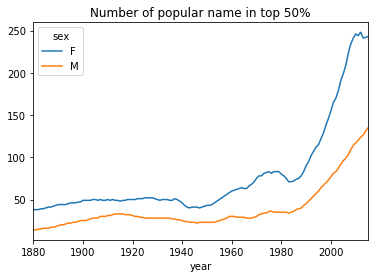

In [76]:
diversity_unstack.plot(title="Number of popular name in top 50%")

## The "Last Letter" Revolution  

In [81]:
#Extract last letter from name column
get_last_letter = lambda x:x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last letter'

table = names.pivot_table('births', index=last_letters, columns = ['sex', 'year'], aggfunc=sum)

In [82]:
subtable = table.reindex(columns = [1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last letter                                                           
a            108397.0  691272.0  676436.0    977.0    5211.0   28846.0
b                 NaN     694.0     455.0    411.0    3912.0   39252.0
c                 5.0      49.0     955.0    482.0   15463.0   23332.0
d              6751.0    3729.0    2639.0  22113.0  262170.0   44795.0
e            133601.0  435062.0  316555.0  28665.0  178809.0  130187.0

In [83]:
subtable.sum()

sex  year
F    1910     396502.0
     1960    2022104.0
     2010    1774186.0
M    1910     194215.0
     1960    2132705.0
     2010    1915331.0
dtype: float64

In [87]:
letter_prop = subtable/subtable.sum().astype(float)
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last letter                                                            
a            0.273383  0.341858  0.381266  0.005031  0.002443  0.015061
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020494
c            0.000013  0.000024  0.000538  0.002482  0.007250  0.012182
d            0.017026  0.001844  0.001487  0.113858  0.122928  0.023388
e            0.336949  0.215153  0.178423  0.147594  0.083841  0.067971
f                 NaN  0.000010  0.000055  0.000783  0.004328  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009488  0.001407
h            0.051531  0.036221  0.075959  0.045568  0.037908  0.051803
i            0.001526  0.039966  0.031701  0.000844  0.000607  0.022664
j                 NaN       NaN  0.000092       NaN       NaN  0.000772
k            0.000121  0.000156  0.000356  0.036578  0.049379  0.018535
l            0.043188  0.033868  0.026385  0.065021  0.104898  0.070450
m            0.001200  0.008613  0.002598  0.058044  0.033833  0.024711
n            0.079235  0.130677  0.140072  0.143387  0.152528  0.362444
o            0.001672  0.002439  0.001247  0.017064  0.012836  0.042576
p            0.000018  0.000023  0.000020  0.003172  0.005673  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013392  0.006767  0.018045  0.064475  0.031042  0.087403
s            0.039039  0.012766  0.013337  0.130803  0.102717  0.065157
t            0.027432  0.015201  0.007842  0.072883  0.065654  0.022865
u            0.000683  0.000574  0.000417  0.000124  0.000057  0.001229
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001450
w            0.000020  0.000031  0.001189  0.006323  0.007710  0.016175
x            0.000015  0.000037  0.000729  0.003965  0.001850  0.008597
y            0.110975  0.152553  0.116761  0.077342  0.160973  0.058187
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001826

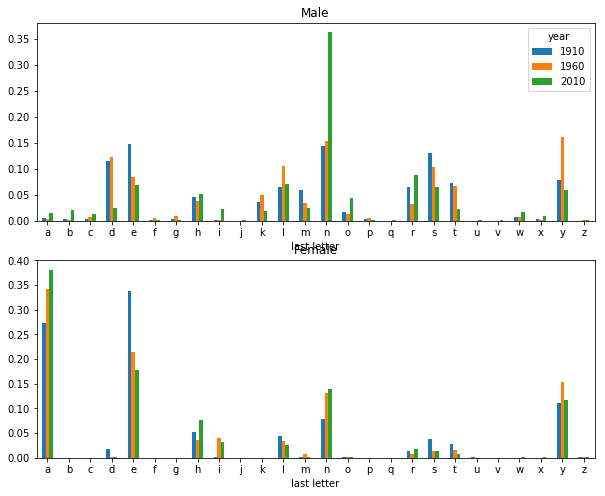

In [88]:
fig,axes = plt.subplots(2,1, figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female', legend=False)

In [92]:
letter_prop = table/table.sum().astype(float)
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts

last letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407
1885,0.085474,0.146346,0.081884
1886,0.087648,0.149661,0.081681
1887,0.089070,0.148844,0.082867
1888,0.087711,0.151285,0.084923


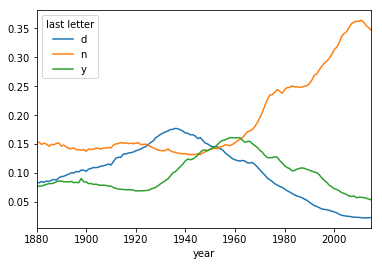

In [93]:
dny_ts.plot()

## Boy names that bcame girl names (and vice versa) 

In [95]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [97]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered

name sex  births  year      prop
year sex                                            
1880 F   654      Leslie   F       8  1880  0.000088
     M   1108     Leslie   M      79  1880  0.000715
1881 F   2522     Leslie   F      11  1881  0.000120
     M   3072     Leslie   M      92  1881  0.000913
1882 F   4593     Leslie   F       9  1882  0.000083
     M   5081     Leslie   M     122  1882  0.001073
         5865     Lesley   M       6  1882  0.000053
1883 F   6850     Leslie   F       7  1883  0.000062
     M   7225     Leslie   M     120  1883  0.001147
         8093     Lesley   M       5  1883  0.000048
1884 F   8697     Leslie   F      15  1884  0.000116
     M   9432     Leslie   M     125  1884  0.001092
1885 F   11161    Leslie   F      10  1885  0.000075
     M   11751    Leslie   M     122  1885  0.001132
1886 F   13601    Leslie   F       8  1886  0.000055
     M   14132    Leslie   M     136  1886  0.001228
1887 F   15806    Leslie   F      12  1887  0.000082
     M   16524    Leslie   M     166  1887  0.001637
1888 F   18030    Leslie   F      23  1888  0.000129
     M   19074    Leslie   M     175  1888  0.001448
1889 F   20690    Leslie   F      23  1889  0.000129
     M   21737    Leslie   M     155  1889  0.001402
1890 F   23332    Leslie   F      20  1890  0.000105
     M   24372    Leslie   M     181  1890  0.001630
1891 F   25928    Leslie   F      28  1891  0.000151
     M   27068    Leslie   M     164  1891  0.001621
1892 F   28704    Leslie   F      22  1892  0.000104
     M   29851    Leslie   M     207  1892  0.001696
1893 F   31576    Leslie   F      26  1893  0.000122
     M   32765    Leslie   M     185  1893  0.001647
...                  ...  ..     ...   ...       ...
2003 F   1423368  Leslie   F    3637  2003  0.001992
         1423641   Lesly   F     839  2003  0.000460
         1423880  Lesley   F     451  2003  0.000247
2004 F   1454550  Leslie   F    3499  2004  0.001907
         1454864   Lesly   F     747  2004  0.000407
         1455067  Lesley   F     451  2004  0.000246
2005 F   1486605  Leslie   F    3122  2005  0.001691
         1486903   Lesly   F     783  2005  0.000424
         1487218  Lesley   F     382  2005  0.000207
2006 F   1519153  Leslie   F    3036  2006  0.001599
         1519464   Lesly   F     761  2006  0.000401
         1519792  Lesley   F     370  2006  0.000195
2007 F   1553251  Leslie   F    2690  2007  0.001401
         1553553   Lesly   F     766  2007  0.000399
         1553941  Lesley   F     352  2007  0.000183
2008 F   1588217  Leslie   F    2325  2008  0.001231
         1588521   Lesly   F     699  2008  0.000370
2009 F   1623295  Leslie   F    1981  2009  0.001080
         1623639   Lesly   F     598  2009  0.000326
2010 F   1658031  Leslie   F    1564  2010  0.000882
         1658413   Lesly   F     505  2010  0.000285
2011 F   1692141  Leslie   F    1285  2011  0.000732
         1692588   Lesly   F     404  2011  0.000230
2012 F   1726054  Leslie   F    1220  2012  0.000695
         1726545   Lesly   F     367  2012  0.000209
2013 F   1759787  Leslie   F    1111  2013  0.000635
         1760342   Lesly   F     313  2013  0.000179
2014 F   1793093  Leslie   F    1000  2014  0.000562
         1793721   Lesly   F     276  2014  0.000155
2015 F   1826333  Leslie   F     878  2015  0.000494

[408 rows x 5 columns]

In [98]:
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35032
Lesli        929
Leslie    376056
Lesly      11432
Name: births, dtype: int64

In [99]:
table = filtered.pivot_table('births',index='year',columns='sex', aggfunc=sum)
table = table.div(table.sum(1),axis=0)
table.tail()

sex,F,M
year,,
2011,1.0,NaN
2012,1.0,NaN
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN


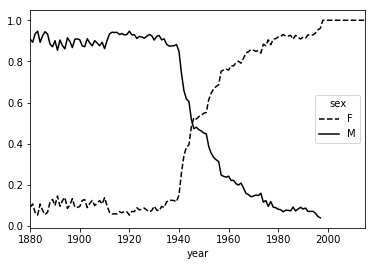

In [101]:
table.plot(style={'M':'k-', 'F': 'k--'})

In [106]:
%xmode?